# STAGE 1: Data Cleaning

## 1. Import Data

In [2]:
import pandas as pd

# Load Excel data into a pandas DataFrame
df = pd.read_excel(r"H:\Data Analyst\Project\ALL files\ipynb\Excel_Data_for_Python\New folder\sales data.xlsx")

# Now, you can work with the data in the 'df' DataFrame
# For example, you can print the first few rows of the DataFrame
df.head()

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,98320.37,77722.25,8/23/2020,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466
1,France,46296.26,40319.41,5/15/2020,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
2,Portugal,140337.34,115708.14,2020-04-09 00:00:00,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141
3,France,203604.46,175344.16,6/26/2019,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106
4,UK,63979.04,56032.84,10/22/2019,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546


## 2. Missing Values / Simpleimputer

In [3]:
# Check for missing values in the entire DataFrame
missing_values = df.isnull().sum()

# To check for missing values in a specific column, you can use:
# missing_values = df['column_name'].isnull().sum()

# Print the columns with missing values and their respective counts
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
order_value_EUR    5
device_type        5
dtype: int64


In [4]:
from sklearn.impute import SimpleImputer

target_column = 'order_value_EUR'

# Create a SimpleImputer instance to impute missing values with a strategy (e.g., 'mean', 'median', 'most_frequent')
# Other strategies include 'constant' to replace missing values with a constant value
imputer = SimpleImputer(strategy='median')

# Fit the imputer on the selected column and transform it to impute missing values
df[target_column] = imputer.fit_transform(df[[target_column]])

In [5]:
df.isnull().sum()

country            0
order_value_EUR    0
cost               0
date               0
category           0
customer_name      0
sales_manager      0
sales_rep          0
device_type        5
order_id           0
dtype: int64

In [6]:
df.device_type.describe()

count     996
unique      3
top        PC
freq      781
Name: device_type, dtype: object

In [7]:
target_column = 'device_type'

# Create a SimpleImputer instance to impute missing values with a strategy (e.g., 'mean', 'median', 'most_frequent')
# Other strategies include 'constant' to replace missing values with a constant value
imputer = SimpleImputer(strategy='most_frequent')

# Fit the imputer on the selected column and transform it to impute missing values
df.device_type = imputer.fit_transform(df['device_type'].values.reshape(-1,1))[:,0]

In [8]:
df.isnull().sum()

country            0
order_value_EUR    0
cost               0
date               0
category           0
customer_name      0
sales_manager      0
sales_rep          0
device_type        0
order_id           0
dtype: int64

## 3. Dealing with Inconsistant Values/ Change DataType

In [9]:
df.dtypes

country             object
order_value_EUR    float64
cost                object
date                object
category            object
customer_name       object
sales_manager       object
sales_rep           object
device_type         object
order_id            object
dtype: object

### Identify Inconsistent value in 'cost' column

In [10]:
# Sample variable containing mixed data
mixed_data = df['cost']

# Create an empty list to store non-numeric values
non_numeric_values= []

# Iterate through the elements in the variable
for value in mixed_data:
    if isinstance(value,str) and not value.isnumeric():
        non_numeric_values.append(value)
# Print the non-numeric values
print("Non-Numeric Values:")
print(non_numeric_values)

Non-Numeric Values:
['XXX']


In [11]:
# Select rows from a dataframe based on column value (ie XXX in 'cost' column)
df_new = df[df['cost'] == 'XXX']
 
print(df_new)

      country  order_value_EUR cost        date category  \
602  Portugal         57120.58  XXX  11/25/2019    Games   

                     customer_name    sales_manager     sales_rep device_type  \
602  Leffler, Prohaska and Streich  Celine Tumasian  Aurelie Wren          PC   

       order_id  
602  55-7848276  


## 4. Remove non-numeric rows in one column with pandas

In [12]:
# Using pd.to_numeric
# This will coerce all non-numeric values to NaN, which will then be flagged as False using notnull(). 
# Other numeric values will be converted to True.

df = df[pd.to_numeric(df['cost'], errors='coerce').notnull()]
df

#Another Method to remove miss-identified data
###mask = (df['cost'] == 'XXX')
#Remove rows that match the mask
###df = df[~mask]

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,98320.37,77722.25,8/23/2020,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466
1,France,46296.26,40319.41,5/15/2020,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
2,Portugal,140337.34,115708.14,2020-04-09 00:00:00,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141
3,France,203604.46,175344.16,6/26/2019,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106
4,UK,63979.04,56032.84,10/22/2019,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546
...,...,...,...,...,...,...,...,...,...,...
996,France,69126.50,55902.6,2019-08-12 00:00:00,Electronics,"Farrell, Swaniawski and Crist",Othello Bowes,Avrit Chanders,PC,07-3201531
997,France,140943.88,120633.87,5/28/2020,Appliances,Armstrong-Little,Othello Bowes,Avrit Chanders,Tablet,77-0650807
998,France,124784.67,106853.11,5/22/2020,Electronics,"Swaniawski, Runolfsson and Green",Othello Bowes,Ora Grennan,Tablet,44-2757396
999,Germany,61968.26,50690.04,12/27/2020,Electronics,Romaguera-Dietrich,Rickard Doogood,Casie MacBain,PC,22-7259031


###  Convert DataType

In [13]:
# To Convert DataType of 'cost' from object to float
df['cost'] =df['cost'].astype(float)

In [14]:
df.dtypes

country             object
order_value_EUR    float64
cost               float64
date                object
category            object
customer_name       object
sales_manager       object
sales_rep           object
device_type         object
order_id            object
dtype: object

In [15]:
# To Convert DataType of 'date' from object to datetime64
# Here we need to assign datetime64[ns] in ''
df['date'] = df['date'].astype('datetime64[ns]')

In [16]:
df.dtypes

country                    object
order_value_EUR           float64
cost                      float64
date               datetime64[ns]
category                   object
customer_name              object
sales_manager              object
sales_rep                  object
device_type                object
order_id                   object
dtype: object

In [17]:
df

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106
4,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546
...,...,...,...,...,...,...,...,...,...,...
996,France,69126.50,55902.60,2019-08-12,Electronics,"Farrell, Swaniawski and Crist",Othello Bowes,Avrit Chanders,PC,07-3201531
997,France,140943.88,120633.87,2020-05-28,Appliances,Armstrong-Little,Othello Bowes,Avrit Chanders,Tablet,77-0650807
998,France,124784.67,106853.11,2020-05-22,Electronics,"Swaniawski, Runolfsson and Green",Othello Bowes,Ora Grennan,Tablet,44-2757396
999,Germany,61968.26,50690.04,2020-12-27,Electronics,Romaguera-Dietrich,Rickard Doogood,Casie MacBain,PC,22-7259031


## 5. Remove Duplicates

In [18]:
# Identify Duplicates
duplicates = df[df.duplicated()]

#Print Duplicate rows
print("Duplicated Rows:")
print(duplicates)

Duplicated Rows:
   country  order_value_EUR      cost       date category   customer_name  \
23      UK         63979.04  56032.84 2019-10-22    Games  Schoen-Keeling   

      sales_manager           sales_rep device_type    order_id  
23  Jessamine Apark  Genevra Charrisson          PC  27-3437546  


In [19]:
# Remove Duplicates and keeping df as it is
df_no_duplicates = df.drop_duplicates()
df_no_duplicates

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106
4,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546
...,...,...,...,...,...,...,...,...,...,...
996,France,69126.50,55902.60,2019-08-12,Electronics,"Farrell, Swaniawski and Crist",Othello Bowes,Avrit Chanders,PC,07-3201531
997,France,140943.88,120633.87,2020-05-28,Appliances,Armstrong-Little,Othello Bowes,Avrit Chanders,Tablet,77-0650807
998,France,124784.67,106853.11,2020-05-22,Electronics,"Swaniawski, Runolfsson and Green",Othello Bowes,Ora Grennan,Tablet,44-2757396
999,Germany,61968.26,50690.04,2020-12-27,Electronics,Romaguera-Dietrich,Rickard Doogood,Casie MacBain,PC,22-7259031


In [20]:
cleaned_data = df_no_duplicates

In [21]:
cleaned_data.head(10)

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106
4,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546
5,Italy,127075.41,110924.13,2019-09-24,Clothing,Labadie and Sons,Piggy Roscrigg,Joshua Prevost,PC,57-6602854
6,Sweden,69681.43,55529.13,2020-01-25,Clothing,Romaguera-Dietrich,Maxie Marrow,Alyosha Meah,PC,78-3301264
7,France,96795.99,81395.75,2019-06-21,Appliances,Connelly-Mohr,Othello Bowes,Avrit Chanders,PC,32-3124563
8,Portugal,144725.34,115056.65,2019-01-15,Smartphones,Wisoky Inc,Celine Tumasian,Aurelie Wren,PC,92-7042708
9,Germany,32695.37,26375.35,2020-11-28,Accessories,Johns and Sons,Rickard Doogood,Casie MacBain,Mobile,15-2994585


# STAGE 2: Data Manipulation

## 1. Sorting

In [22]:
df_sorted = cleaned_data.sort_values(by = 'cost')
df_sorted

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
422,Sweden,15100.570,12113.68,2019-02-20,Games,"Murray, Reichel and Nolan",Maxie Marrow,Tarrah Castelletti,PC,89-2424262
275,France,16388.900,13430.70,2020-03-15,Electronics,West-Cummings,Othello Bowes,Crysta Halls,PC,30-9690927
17,Sweden,15817.050,13743.44,2019-10-03,Clothing,Kihn Inc,Maxie Marrow,Anita Woakes,PC,26-9787272
971,Netherlands,105357.645,14102.75,2020-07-02,Clothing,Johns and Sons,Denice Amberg,Nero Harbisher,PC,38-5910704
138,Sweden,17524.020,14122.61,2020-12-02,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,02-3364199
...,...,...,...,...,...,...,...,...,...,...
766,Sweden,325331.990,264592.51,2019-12-23,Games,Altenwerth-Konopelski,Maxie Marrow,Caro Morfield,Mobile,57-4142025
242,Luxembourg,312928.720,270401.71,2019-12-12,Beauty,Altenwerth-Konopelski,Ilsa Kob,Jocelyn Laurentino,Tablet,98-5257166
413,Netherlands,353925.060,287528.72,2020-04-12,Clothing,Corwin and Sons,Denice Amberg,Nero Harbisher,PC,36-2694099
84,Ireland,361182.870,288368.40,2019-02-12,Books,Smith Group,Glenine Suttaby,Bunnie Tonbridge,PC,44-1953194


## 2. Conditional Formating

In [23]:
df_filter = df[(df['country'] == 'Germany') & (df['category'] == 'Games')]
df_filter

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
37,Germany,180519.86,145968.36,2019-04-07,Games,"Jacobson, Marvin and Brown",Rickard Doogood,Casie MacBain,PC,86-6107692
133,Germany,161217.16,135696.48,2019-10-20,Games,Labadie and Sons,Rickard Doogood,Casie MacBain,PC,98-6247105


In [24]:
Not_Germany_df = df[df['country'] != 'Germany']
Not_Germany_df

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106
4,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546
...,...,...,...,...,...,...,...,...,...,...
995,Netherlands,95575.75,75504.84,2020-12-23,Books,Hessel-Stiedemann,Denice Amberg,Nero Harbisher,PC,35-9372764
996,France,69126.50,55902.60,2019-08-12,Electronics,"Farrell, Swaniawski and Crist",Othello Bowes,Avrit Chanders,PC,07-3201531
997,France,140943.88,120633.87,2020-05-28,Appliances,Armstrong-Little,Othello Bowes,Avrit Chanders,Tablet,77-0650807
998,France,124784.67,106853.11,2020-05-22,Electronics,"Swaniawski, Runolfsson and Green",Othello Bowes,Ora Grennan,Tablet,44-2757396


## 3. Data Merging

In [25]:
# Load Excel data('Extra Variable.xlsx') into a pandas DataFrame
extra_vars = pd.read_excel(r"H:\Data Analyst\Project\ALL files\ipynb\Excel_Data_for_Python\New folder\Extra Variable.xlsx")
extra_vars

,order_id,refund
0,70-0511466,43621
1,77-3489084,13385
2,65-8218141,69535
3,29-5478106,90064
4,57-6602854,61736
...,...,...
995,07-3201531,27600
996,77-0650807,69762
997,44-2757396,60614
998,22-7259031,23360


In [26]:
# Merge 'cleaned_data' with 'extra_vars' on 'order_id'
merged_df = cleaned_data.merge(extra_vars, on = 'order_id')
merged_df

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund
0,Sweden,98320.37,77722.25,2020-08-23,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466,43621
1,France,46296.26,40319.41,2020-05-15,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084,13385
2,Portugal,140337.34,115708.14,2020-04-09,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141,69535
3,France,203604.46,175344.16,2019-06-26,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106,90064
4,UK,63979.04,56032.84,2019-10-22,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546,24176
...,...,...,...,...,...,...,...,...,...,...,...
994,France,69126.50,55902.60,2019-08-12,Electronics,"Farrell, Swaniawski and Crist",Othello Bowes,Avrit Chanders,PC,07-3201531,27600
995,France,140943.88,120633.87,2020-05-28,Appliances,Armstrong-Little,Othello Bowes,Avrit Chanders,Tablet,77-0650807,69762
996,France,124784.67,106853.11,2020-05-22,Electronics,"Swaniawski, Runolfsson and Green",Othello Bowes,Ora Grennan,Tablet,44-2757396,60614
997,Germany,61968.26,50690.04,2020-12-27,Electronics,Romaguera-Dietrich,Rickard Doogood,Casie MacBain,PC,22-7259031,23360


## 4. Data Concatenate 

In [27]:
# Load Excel data('Extra Data.xlsx') into a pandas DataFrame
extra_data = pd.read_excel(r"H:\Data Analyst\Project\ALL files\ipynb\Excel_Data_for_Python\New folder\Extra Data.xlsx")
extra_data

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund
0,Sweden,17524.02,14122.61,2020-12-02 00:00:00,Books,Goldner-Dibbert,Maxie Marrow,Madelon Bront,Mobile,70-0511466,7964
1,France,64827.80,56043.63,1/20/2019,Appliances,Gislason-Stanton,Othello Bowes,Maighdiln Upcraft,PC,62-3312495,4974
2,Portugal,71620.08,62245.01,2019-05-02 00:00:00,Books,Schoen-Keeling,Celine Tumasian,Smitty Culverhouse,NaN,69-6259390,2809
3,Portugal,74532.02,59752.32,2020-02-04 00:00:00,Beauty,Hessel-Stiedemann,Celine Tumasian,Aurelie Wren,PC,14-6700183,4260
4,Portugal,78461.13,63537.82,2020-10-05 00:00:00,Appliances,Hessel-Stiedemann,Celine Tumasian,Smitty Culverhouse,Mobile,91-4126746,6038
5,Spain,84900.24,73701.90,7/14/2020,Clothing,"Farrell, Swaniawski and Crist",Emalia Dinse,Perri Aldersley,PC,60-6998932,7598
6,Finland,116563.40,92807.78,9/26/2019,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323,2928
7,UK,156585.22,126599.15,8/30/2020,Accessories,"Hermiston, Simonis and Wisoky",Jessamine Apark,Winny Agnolo,PC,64-5761908,9376
8,Spain,178763.42,146621.76,12/22/2019,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160,5153
9,Portugal,296685.56,257480.34,2019-11-07 00:00:00,Clothing,Larkin-Collier,Celine Tumasian,Smitty Culverhouse,PC,58-7703341,3955


In [28]:
final_df = pd.concat([merged_df, extra_data], ignore_index=True)
final_df

,country,order_value_EUR,cost,date,category,customer_name,sales_manager,sales_rep,device_type,order_id,refund
0,Sweden,98320.37,77722.25,2020-08-23 00:00:00,Games,Konopelski LLC,Maxie Marrow,Tarrah Castelletti,Tablet,70-0511466,43621
1,France,46296.26,40319.41,2020-05-15 00:00:00,Games,Wisoky Inc,Othello Bowes,Amelina Piscopiello,Tablet,77-3489084,13385
2,Portugal,140337.34,115708.14,2020-04-09 00:00:00,Appliances,Hegmann Group,Celine Tumasian,Corene Shirer,PC,65-8218141,69535
3,France,203604.46,175344.16,2019-06-26 00:00:00,Electronics,Kirlin and Sons,Othello Bowes,Crysta Halls,Mobile,29-5478106,90064
4,UK,63979.04,56032.84,2019-10-22 00:00:00,Games,Schoen-Keeling,Jessamine Apark,Genevra Charrisson,PC,27-3437546,24176
...,...,...,...,...,...,...,...,...,...,...,...
1004,Spain,84900.24,73701.90,7/14/2020,Clothing,"Farrell, Swaniawski and Crist",Emalia Dinse,Perri Aldersley,PC,60-6998932,7598
1005,Finland,116563.40,92807.78,9/26/2019,Games,Hilll-Vandervort,Hube Corey,Wat Bowkley,Mobile,28-6585323,2928
1006,UK,156585.22,126599.15,8/30/2020,Accessories,"Hermiston, Simonis and Wisoky",Jessamine Apark,Winny Agnolo,PC,64-5761908,9376
1007,Spain,178763.42,146621.76,12/22/2019,Games,Johns and Sons,Emalia Dinse,Bertha Walbrook,Tablet,15-8765160,5153


# STAGE 3: Exploratory Data Analysis (EDA)

## 1. Exploring VALUE_COUNTS analysis method

### What is the primary country of residence for the majority of our customers?

In [29]:
country_frequency = final_df['country'].value_counts()
country_frequency

country
Portugal       242
France         233
Sweden         183
UK             102
Finland         45
Ireland         43
Bulgaria        30
Spain           28
Netherlands     28
Germany         24
Luxembourg      22
Denmark         11
Italy           10
Belgium          6
Austria          2
Name: count, dtype: int64

In [30]:
import matplotlib.pyplot as plt

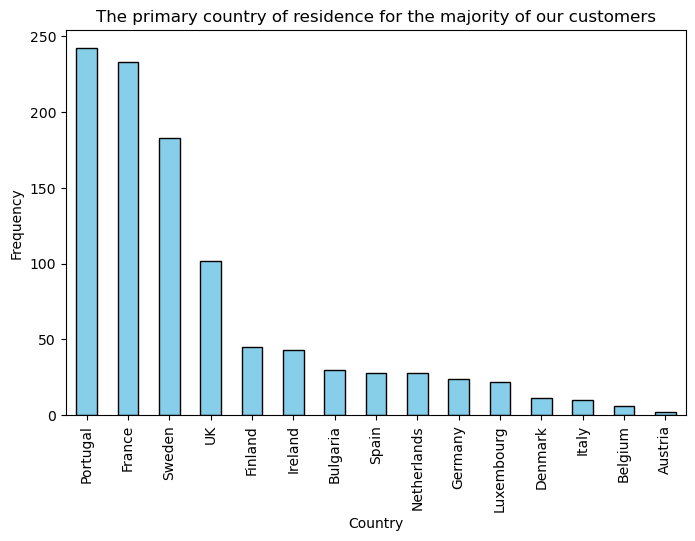

In [31]:
# Create a bar plot for the 'country_frequency'
country_frequency.plot(kind='bar', color='skyblue', edgecolor='black', figsize=(8, 5))
plt.title('The primary country of residence for the majority of our customers')
plt.xlabel('Country')
plt.ylabel('Frequency')
#plt.xticks(rotation=90) # Rotate x-axis labels if needed
plt.show()

### Which product category has the highest frequency of sales?

In [32]:
productcat_frequency = final_df['category'].value_counts()
productcat_frequency

category
Clothing       157
Games          140
Electronics    134
Appliances     133
Books          119
Beauty         116
Smartphones     95
Outdoors        50
Accessories     36
Other           29
Name: count, dtype: int64

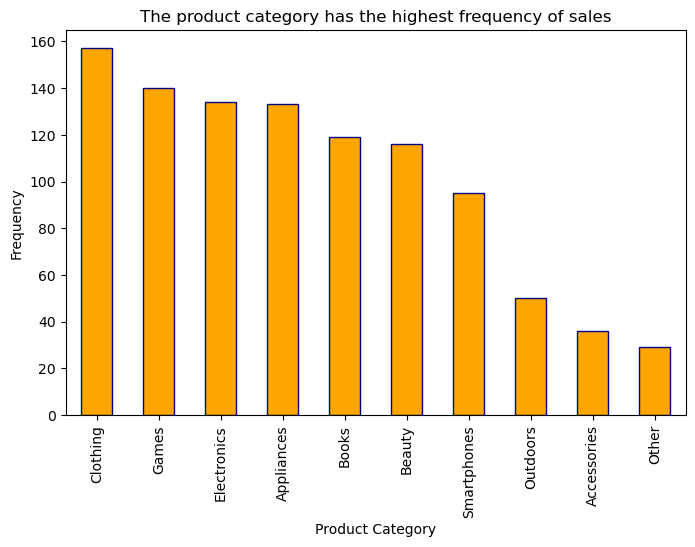

In [33]:
# Create a bar plot for the 'country_frequency'
productcat_frequency.plot(kind = 'bar', color = 'orange', edgecolor = 'darkblue', figsize = (8,5))
plt.title('The product category has the highest frequency of sales')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.show()

### Identify the top 5 customers with the most repeat purchases.

In [34]:
top_5_customers_frequency = final_df['customer_name'].value_counts().head(5)
top_5_customers_frequency

customer_name
Johns and Sons                      143
Hessel-Stiedemann                    57
Swaniawski, Runolfsson and Green     25
Dickinson, Hyatt and Berge           24
Murray, Reichel and Nolan            23
Name: count, dtype: int64

### Who among the sales managers has achieved the highest number of sales?

In [35]:
salesman_frequency = final_df['sales_manager'].value_counts()
salesman_frequency

sales_manager
Celine Tumasian     242
Othello Bowes       233
Maxie Marrow        183
Jessamine Apark     102
Hube Corey           45
Glenine Suttaby      43
Charil Alpe          30
Emalia Dinse         28
Denice Amberg        28
Rickard Doogood      24
Ilsa Kob             22
Modestia Byfford     11
Piggy Roscrigg       10
Lambert Norheny       6
Orsa Geekin           2
Name: count, dtype: int64

### Who are the top 5 sales representatives with the highest number of sales?

In [36]:
salesrep_frequency = final_df['sales_rep'].value_counts()
salesrep_frequency

sales_rep
Amelina Piscopiello    56
Corene Shirer          53
Aurelie Wren           52
Hortense Gerring       52
Ora Grennan            50
Crysta Halls           47
Smitty Culverhouse     44
Avrit Chanders         43
Brynn Dempster         41
Madelon Bront          40
Alyosha Meah           40
Winny Agnolo           39
Tarrah Castelletti     38
Maighdiln Upcraft      37
Genevra Charrisson     37
Anita Woakes           36
Caro Morfield          29
Nero Harbisher         28
Jay Morefield          26
Wat Bowkley            24
Casie MacBain          24
Bunnie Tonbridge       23
Jocelyn Laurentino     22
Mellicent Mattys       21
Palm Wetherald         20
Bernadine Fullagar     15
Shermy McGready        15
Perri Aldersley        13
Joshua Prevost         10
Bertha Walbrook        10
Case Desorts            6
Collin Mackness         6
Manuel Goudie           5
Cobby Andersen          5
Bank Coumbe             2
Name: count, dtype: int64

### Which device is predominantly used for making product purchases?

In [37]:
devtype_frequency = final_df['device_type'].value_counts()
devtype_frequency

device_type
PC        789
Mobile    145
Tablet     74
Name: count, dtype: int64

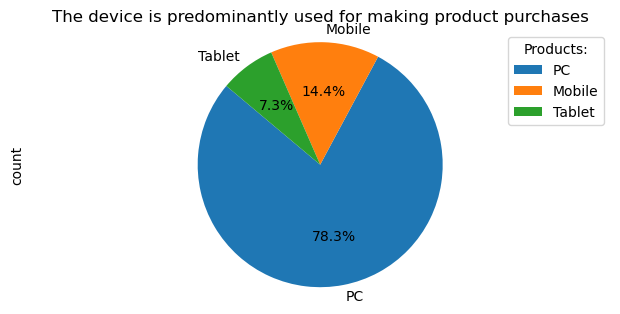

In [38]:
# Calculate relative frequencies (percentages)
devtype_percent = (devtype_frequency*100)/devtype_frequency.sum()
devtype_percent

# Create a pie chart for the percentages
devtype_percent.plot(kind ='pie', labels=devtype_percent.index, autopct='%1.1f%%', startangle=140, figsize=(7.50, 3.50))

plt.title('The device is predominantly used for making product purchases')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title = "Products:", loc="best")

# Show the pie chart
plt.show()

## 2. DESCRIPTIVE ANALYSIS METHOD

### Find the descriptives of order value, cost and refund.

In [39]:
numeric_columns = ['order_value_EUR', 'cost', 'refund']
numeric_summery = final_df[numeric_columns].describe()
numeric_summery

,order_value_EUR,cost,refund
count,1009.000000,1009.000000,1009.000000
mean,113267.885208,94422.763518,49236.007929
std,61615.866535,51693.620772,28744.989463
min,15100.570000,12113.680000,1009.000000
25%,65760.390000,54635.770000,24597.000000
50%,105357.645000,86928.030000,48652.000000
75%,151012.120000,126080.020000,74664.000000
max,383996.760000,304701.430000,99539.000000


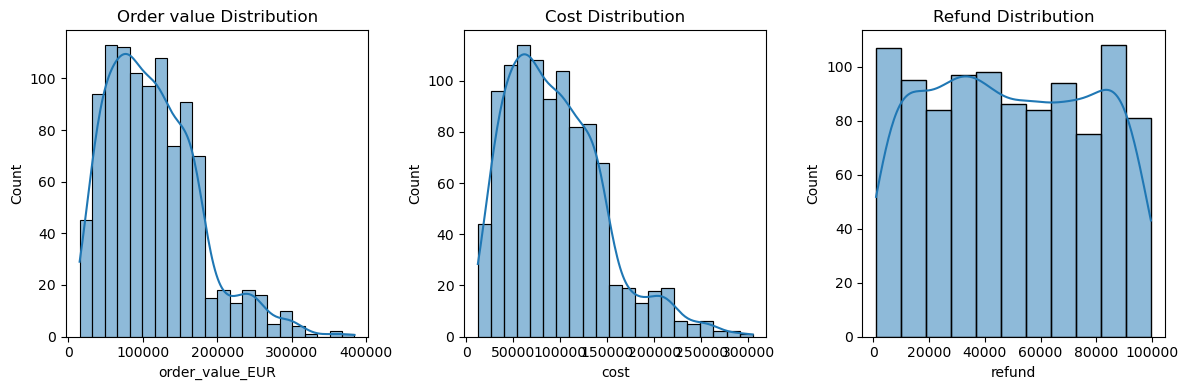

In [40]:
#Seaborn: provides a high-level interface for drawing attractive and informative statistical graphics.
import seaborn as sns

# Create a figure with three subplots for the numeric variables
plt.figure(figsize=(12, 4))

# Plot the distribution of 'order_value_EUR' in the first subplot
plt.subplot(131) # 1 row, 3 columns, first subplot
sns.histplot(final_df['order_value_EUR'], kde=True)
plt.title('Order value Distribution')

# Plot the distribution of 'cost' in the first subplot
plt.subplot(132) # 1 row, 3 columns, second subplot
sns.histplot(final_df['cost'], kde = True)
plt.title('Cost Distribution')

# Plot the distribution of 'refund' in the first subplot
plt.subplot(133) # 1 row, 3 columns, third subplot
sns.histplot(final_df['refund'], kde=True)
plt.title('Refund Distribution')

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

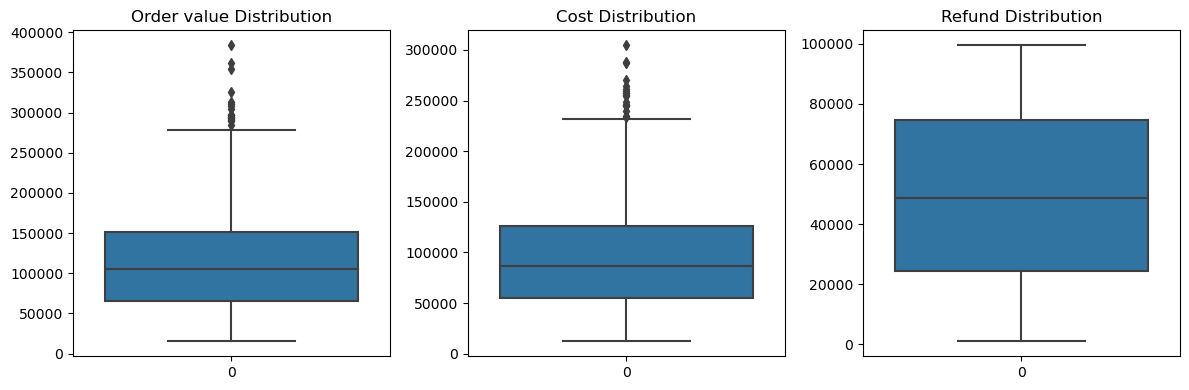

In [41]:
# Create a figure with three subplots for the boxplot
plt.figure(figsize=(12, 4))

# Plot the distribution of 'order_value_EUR' in the first subplot
plt.subplot(131) # 1 row, 3 columns, first subplot
sns.boxplot(data = final_df['order_value_EUR'])
plt.title('Order value Distribution')

# Plot the distribution of 'cost' in the first subplot
plt.subplot(132) # 1 row, 3 columns, second subplot
sns.boxplot(data = final_df['cost'])
plt.title('Cost Distribution')

# Plot the distribution of 'refund' in the first subplot
plt.subplot(133) # 1 row, 3 columns, third subplot
sns.boxplot(data = final_df['refund'])
plt.title('Refund Distribution')

# Adjust layout and show the figure
plt.tight_layout()
plt.show()

## 3. GROUPBY

### Identify the top 3 product categories based on both order value and cost.

In [42]:
median_order_value = final_df.groupby('category')['order_value_EUR'].median()
median_order_value.sort_values(ascending = False)

category
Accessories    139619.740
Outdoors       111875.915
Smartphones    111639.290
Games          108125.365
Clothing       103726.570
Beauty         103345.925
Appliances     100978.490
Electronics     99809.630
Books           99518.860
Other           77087.840
Name: order_value_EUR, dtype: float64

In [43]:
median_cost_values = final_df.groupby('category')['cost'].median()
median_cost_values.sort_values(ascending = False)

category
Accessories    116395.415
Smartphones     96566.370
Outdoors        94660.390
Games           92756.590
Clothing        86581.390
Beauty          86442.810
Books           84761.750
Appliances      84128.530
Electronics     83245.005
Other           65894.690
Name: cost, dtype: float64

### Determine the top 3 customers who contribute the most to profitability and have the highest expenses.

In [44]:
median_customer_profitability = final_df.groupby('customer_name')['order_value_EUR'].median()
median_customer_profitability.sort_values(ascending=False)

customer_name
Schuster Inc                     201573.230
Tromp LLC                        172340.860
Jacobson, Marvin and Brown       158011.300
O'Connell-Mitchell               156441.185
West-Cummings                    153823.740
                                    ...    
Rath-Schroeder                    69664.885
Homenick-Marvin                   57748.435
Lind, Mueller and Stoltenberg     57115.990
Lueilwitz, Kerluke and Lesch      54079.040
Gorczany-Lehner                   33724.530
Name: order_value_EUR, Length: 75, dtype: float64

In [45]:
median_customer_expenses = final_df.groupby('customer_name')['cost'].median()
median_customer_expenses.sort_values(ascending=False)

customer_name
Schuster Inc                     163052.820
Jacobson, Marvin and Brown       137390.830
Tromp LLC                        136562.900
West-Cummings                    129258.090
O'Connell-Mitchell               129090.565
                                    ...    
Rath-Schroeder                    56826.990
Lind, Mueller and Stoltenberg     48976.960
Homenick-Marvin                   46504.600
Lueilwitz, Kerluke and Lesch      45031.620
Gorczany-Lehner                   26770.530
Name: cost, Length: 75, dtype: float64

### Which sales representative's transactions resulted in the highest amount of refunds to customers?

In [46]:
median_sal_rep_refund = final_df.groupby('sales_rep')['refund'].median()
median_sal_rep_refund.sort_values(ascending=False)

sales_rep
Mellicent Mattys       65788.0
Corene Shirer          65117.0
Jay Morefield          63302.5
Winny Agnolo           60180.0
Bernadine Fullagar     59556.0
Palm Wetherald         55253.5
Jocelyn Laurentino     54422.5
Hortense Gerring       54201.5
Joshua Prevost         53876.5
Amelina Piscopiello    51615.5
Madelon Bront          50451.5
Collin Mackness        49281.5
Anita Woakes           48598.0
Brynn Dempster         48333.0
Wat Bowkley            48265.0
Shermy McGready        48238.0
Nero Harbisher         47320.5
Maighdiln Upcraft      46850.0
Genevra Charrisson     46381.0
Bertha Walbrook        46047.5
Aurelie Wren           46036.0
Avrit Chanders         45035.0
Tarrah Castelletti     43647.5
Bank Coumbe            42433.0
Alyosha Meah           41807.5
Ora Grennan            40519.0
Casie MacBain          40373.5
Crysta Halls           39735.0
Smitty Culverhouse     39691.5
Bunnie Tonbridge       38062.0
Caro Morfield          37786.0
Perri Aldersley        37358.

## 4. PIVOT TABLE

### Who are the most loyal customers of your superstore?

In [47]:
# Create a pivot table based on median sales, cost, and counts for each product category
loyal_customer_pivot_table = final_df.pivot_table(index= 'customer_name',
                                                   values= ['order_value_EUR','cost'],
                                                    aggfunc={'customer_name':'count',
                                                             'order_value_EUR':'median', 
                                                             'cost':'median'})
# Rename the columns for clarity
loyal_customer_pivot_table = loyal_customer_pivot_table.rename(columns={'order_value_EUR': 'Median_Sales',
                                                                         'cost': 'Median_Cost',
                                                                         'customer_name': 'Count'})
# Print the pivot table
sorted_pivot_table = loyal_customer_pivot_table.sort_values(by = 'Count', ascending = False)
top_10 = sorted_pivot_table[0:10]
top_10

,Median_Cost,Count,Median_Sales
customer_name,,,
Johns and Sons,86694.33,143,106115.850
Hessel-Stiedemann,79127.71,57,95960.770
"Swaniawski, Runolfsson and Green",84690.35,25,100094.970
"Dickinson, Hyatt and Berge",85886.10,24,104540.680
"Murray, Reichel and Nolan",71501.10,23,88832.280
"Rowe, Hermiston and Kessler",66065.68,22,77690.890
Larkin-Collier,105025.33,22,129035.985
Kihn Inc,66742.15,22,80450.080
Wisoky Inc,94336.18,21,115226.800


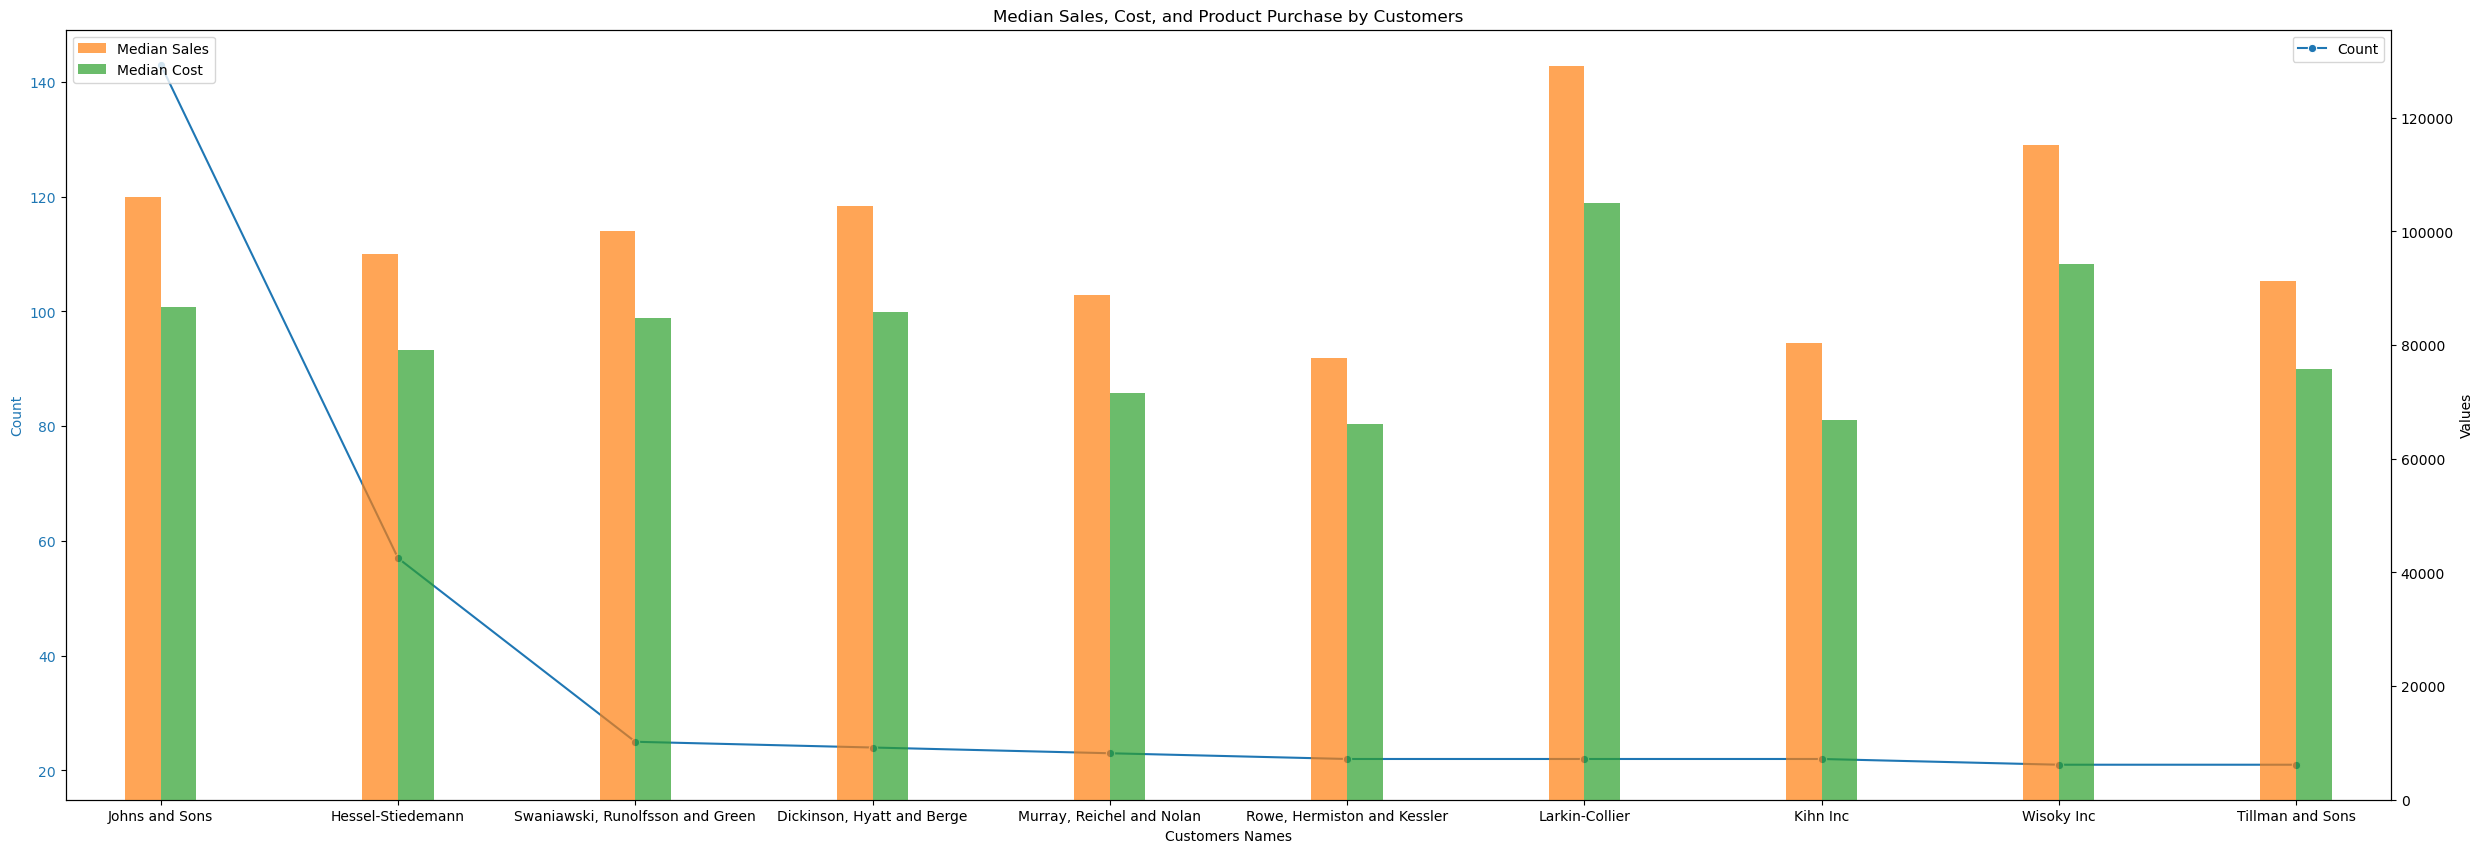

In [48]:
# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(30, 10))

# Plot the count in a line plot
sns.lineplot(data=top_10['Count'], marker='o', ax=ax1, color='tab:blue', label='Count')
ax1.set_xlabel('Customers Names')
ax1.set_ylabel('Count', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a second y-axis for the bar plots
ax2 = ax1.twinx()

# Plot the median sales and median cost in bar plots
bar_plot = top_10[['Median_Sales', 'Median_Cost']].plot(kind='bar', ax=ax2, width=0.3, color=['tab:orange', 'tab:green'], alpha=0.7)
ax2.set_ylabel('Values', color='black')
ax2.tick_params(axis='y', labelcolor='black')
bar_plot.set_xticklabels(top_10.index, rotation=90, ha='center')

# Customize the plot
plt.title('Median Sales, Cost, and Product Purchase by Customers')
ax2.legend(loc='upper left', labels=['Median Sales', 'Median Cost'])

# Show the plot
plt.show()

## 5. CROSSTABULATION

### Under which sales manager, which product category has the highest sales volume?

In [49]:
# CROSSTABULATION: help us to understand the relationship between two or more variable.
crosstab_sal_man = pd.crosstab(final_df['sales_manager'], final_df['category'])
crosstab_sal_man

category,Accessories,Appliances,Beauty,Books,Clothing,Electronics,Games,Other,Outdoors,Smartphones
sales_manager,,,,,,,,,,
Celine Tumasian,8,30,27,27,40,28,40,6,13,23
Charil Alpe,1,4,2,6,3,4,5,0,2,3
Denice Amberg,0,2,1,4,6,4,4,0,2,5
Emalia Dinse,0,1,4,1,5,7,5,2,1,2
Glenine Suttaby,1,3,6,3,6,7,6,2,3,6
Hube Corey,1,8,6,2,8,5,12,1,2,0
Ilsa Kob,2,2,3,3,3,2,3,0,2,2
Jessamine Apark,7,11,10,14,18,8,14,2,10,8
Lambert Norheny,1,2,0,0,1,0,1,0,0,1


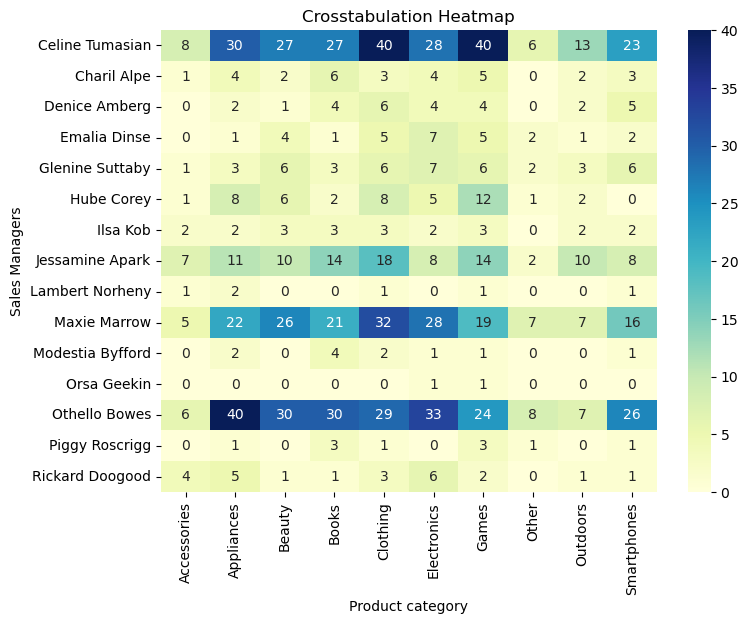

In [50]:
# Visualize the crosstabulation as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_sal_man, annot=True, cmap="YlGnBu", fmt='d', cbar=True)
plt.title('Crosstabulation Heatmap')
plt.xlabel('Product category')
plt.ylabel('Sales Managers')

# Show the plot
plt.show()

### In which country did a particular sales representative achieve the highest sales volume?

In [51]:
crosstab_sal_rep = pd.crosstab(final_df['sales_rep'], final_df['country'])
crosstab_sal_rep

country,Austria,Belgium,Bulgaria,Denmark,Finland,France,Germany,Ireland,Italy,Luxembourg,Netherlands,Portugal,Spain,Sweden,UK
sales_rep,,,,,,,,,,,,,,,
Alyosha Meah,0,0,0,0,0,0,0,0,0,0,0,0,0,40,0
Amelina Piscopiello,0,0,0,0,0,56,0,0,0,0,0,0,0,0,0
Anita Woakes,0,0,0,0,0,0,0,0,0,0,0,0,0,36,0
Aurelie Wren,0,0,0,0,0,0,0,0,0,0,0,52,0,0,0
Avrit Chanders,0,0,0,0,0,43,0,0,0,0,0,0,0,0,0
Bank Coumbe,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Bernadine Fullagar,0,0,15,0,0,0,0,0,0,0,0,0,0,0,0
Bertha Walbrook,0,0,0,0,0,0,0,0,0,0,0,0,10,0,0
Brynn Dempster,0,0,0,0,0,0,0,0,0,0,0,41,0,0,0


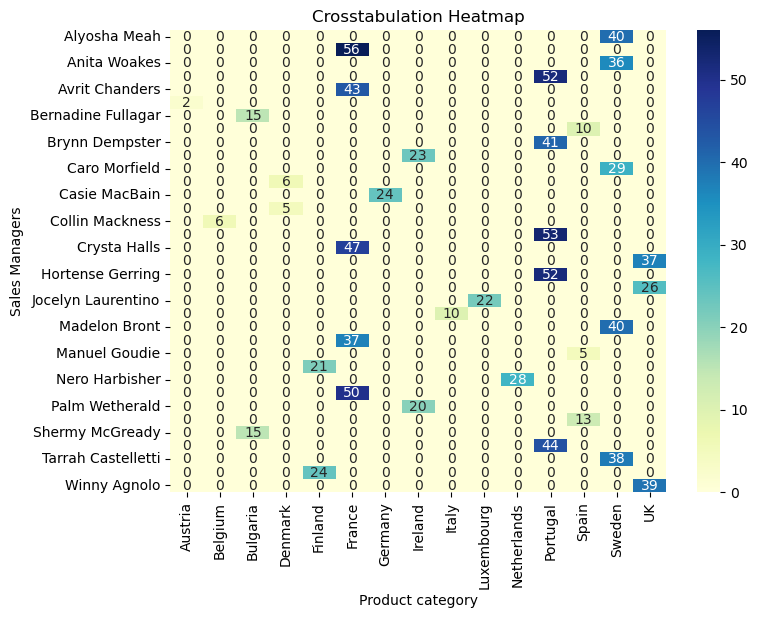

In [52]:
# Visualize the crosstabulation as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(crosstab_sal_rep, annot=True, cmap="YlGnBu", fmt='d', cbar=True)
plt.title('Crosstabulation Heatmap')
plt.xlabel('Product category')
plt.ylabel('Sales Managers')

# Show the plot
plt.show()

## 6. CORRELATION

### Find the relationship between order value, cost and refund amount.

In [53]:
# Calculate the correlation matrix
correlation_matrix = final_df[['order_value_EUR','cost','refund']].corr()
correlation_matrix

,order_value_EUR,cost,refund
order_value_EUR,1.000000,0.991741,0.927242
cost,0.991741,1.000000,0.924964
refund,0.927242,0.924964,1.000000


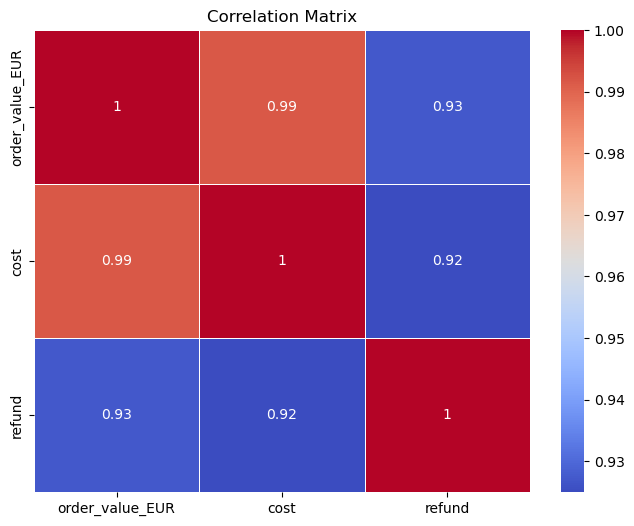

In [54]:
# Visualize the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# STAGE 4 STATIDTICAL DATA ANALYSIS / DATA TRANSFORMATION

## Detecting Normality

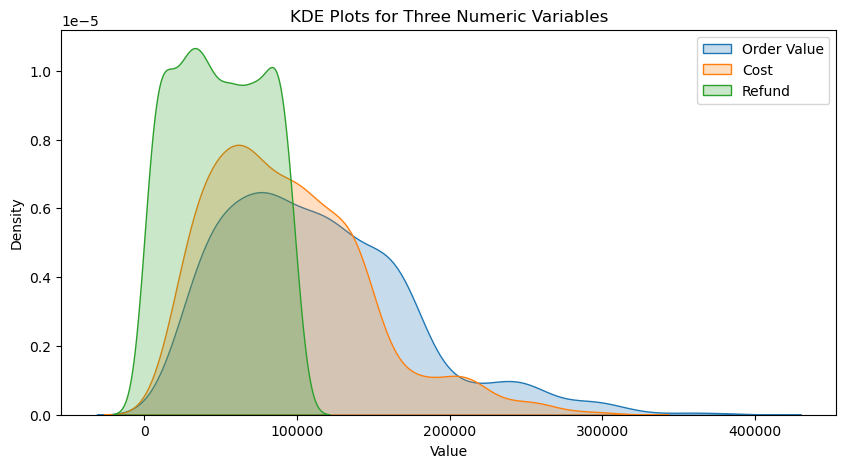

In [57]:
# Create subplots for the KDE plots
fig, ax = plt.subplots(figsize=(10, 5))

# Plot the order KDE plot
sns.kdeplot(final_df['order_value_EUR'], label="Order Value", fill=True)

# Plot the cost KDE plot
sns.kdeplot(final_df['cost'], label="Cost", fill=True)

# Plot the refund KDE plot
sns.kdeplot(final_df['refund'], label="Refund", fill=True)

# Set plot title and labels
plt.title('KDE Plots for Three Numeric Variables')
plt.xlabel('Value')
plt.ylabel('Density')

# Add a legend
plt.legend()

# Show the plot
plt.show()

## 1. SQUARE ROOT TRANSFORMATION

<Axes: xlabel='order_value_EUR', ylabel='Density'>

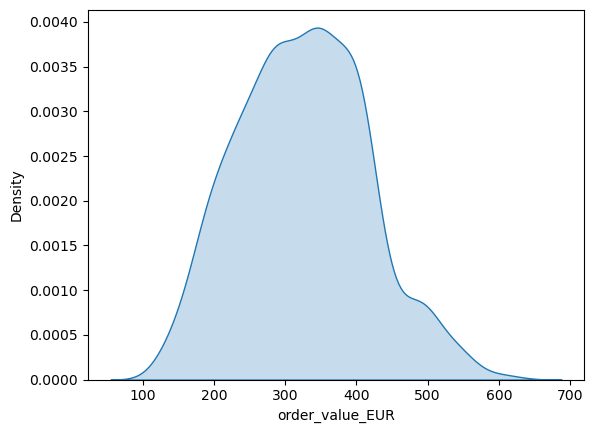

In [61]:
#Square root
import numpy as np

# Apply the square root transformation
sqrt_order = np.sqrt(final_df['order_value_EUR'])
sns.kdeplot(sqrt_order, fill=True)

<Axes: xlabel='cost', ylabel='Density'>

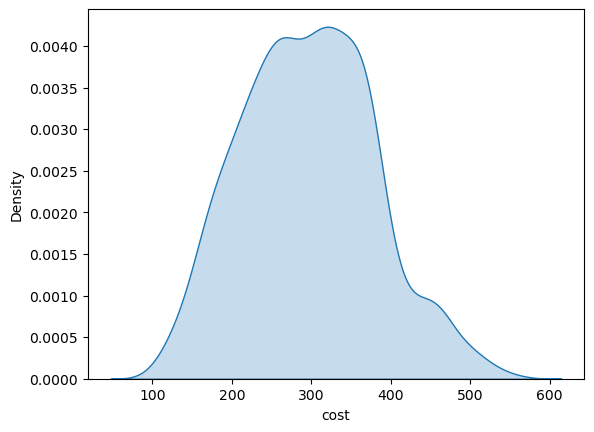

In [63]:
sqrt_cost = np.sqrt(final_df['cost'])
sns.kdeplot(sqrt_cost, fill=True)

<Axes: xlabel='refund', ylabel='Density'>

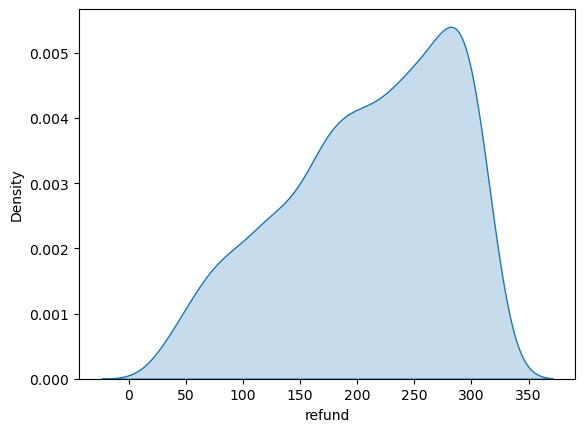

In [64]:
sqrt_refund = np.sqrt(final_df['refund'])
sns.kdeplot(sqrt_refund, fill=True)

## 2. LOGRITHMIC METHOD TRANSFORMATION

<Axes: xlabel='order_value_EUR', ylabel='Density'>

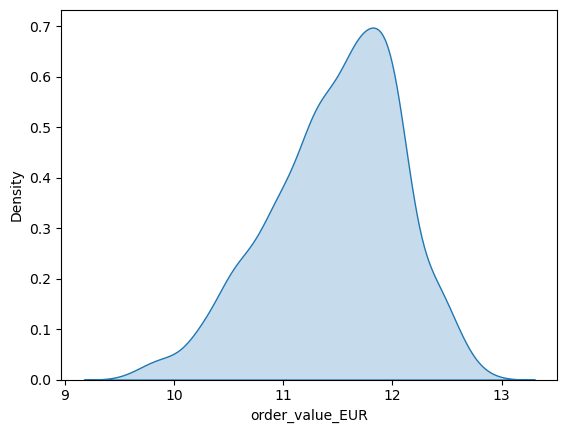

In [65]:
#Logarithmic

# Apply the log transformation
log_orderval = np.log(final_df['order_value_EUR'])

sns.kdeplot(log_orderval, fill=True)

<Axes: xlabel='cost', ylabel='Density'>

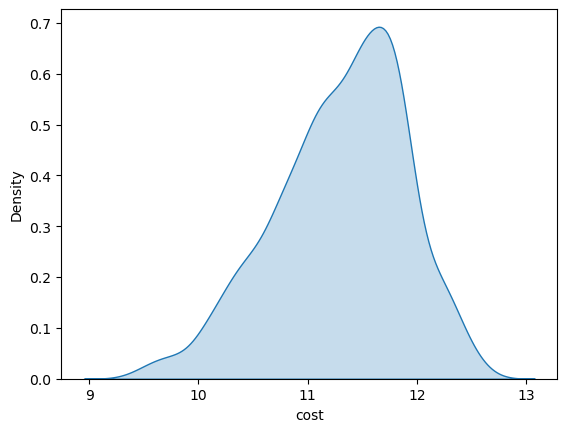

In [67]:
log_cost = np.log(final_df['cost'])
sns.kdeplot(log_cost, fill=True)

<Axes: xlabel='refund', ylabel='Density'>

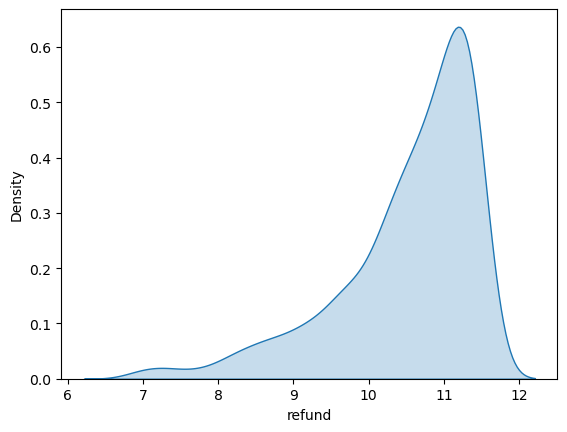

In [68]:
log_refund = np.log(final_df['refund'])
sns.kdeplot(log_refund, fill=True)

## 3. BOX-COX TRANSFORMATION

<Axes: ylabel='Density'>

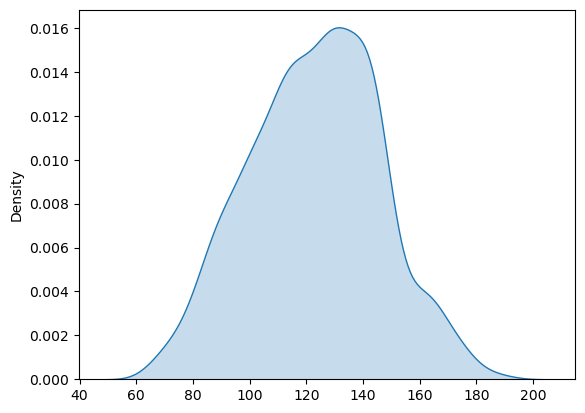

In [79]:
#Box - cox
from scipy import stats

# Apply the Box-Cox transformation
boxcox_orderval, lambda_value = stats.boxcox(final_df['order_value_EUR'])
sns.kdeplot(boxcox_orderval, fill=True)

<Axes: ylabel='Density'>

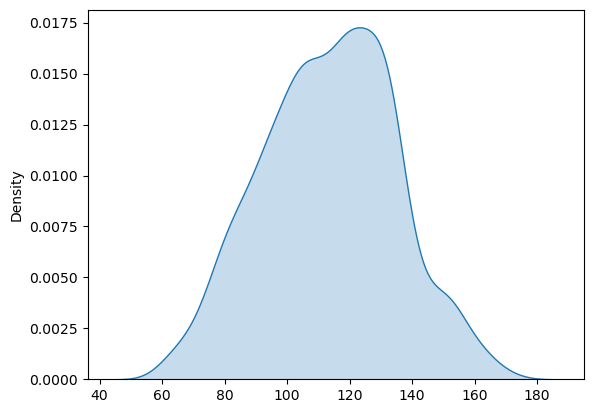

In [72]:
boxcox_cost, lambda_value = stats.boxcox(final_df['cost'])
sns.kdeplot(boxcox_cost, fill=True)

<Axes: ylabel='Density'>

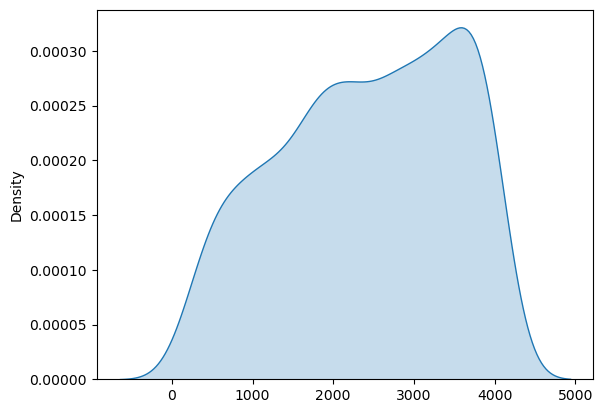

In [74]:
boxcox_refund, lambda_value = stats.boxcox(final_df['refund'])
sns.kdeplot(boxcox_refund, fill=True)

## 4. YEO-JOHNSON TRANSFORMATION

<Axes: ylabel='Density'>

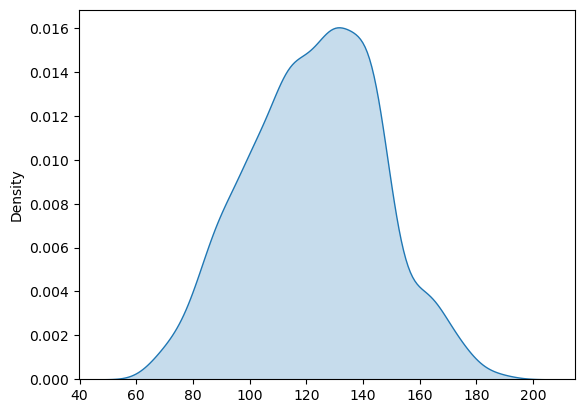

In [75]:
#Yeo - Johnson

# Apply the Yeo-Johnson transformation
yeo_orderval, lambda_value = stats.yeojohnson(final_df['order_value_EUR'])
sns.kdeplot(yeo_orderval, fill=True)

<Axes: ylabel='Density'>

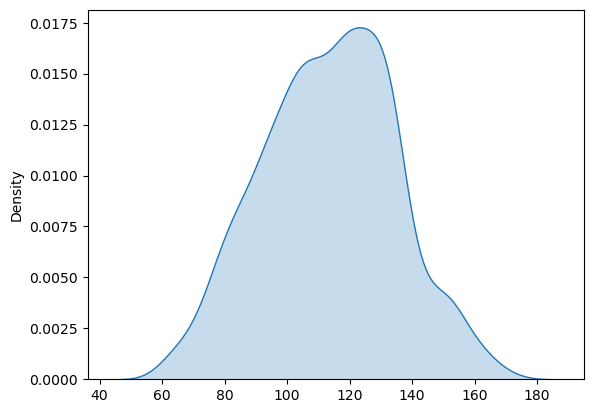

In [76]:
yeo_cost, lambda_value = stats.yeojohnson(final_df['cost'])
sns.kdeplot(yeo_cost, fill=True)

<Axes: ylabel='Density'>

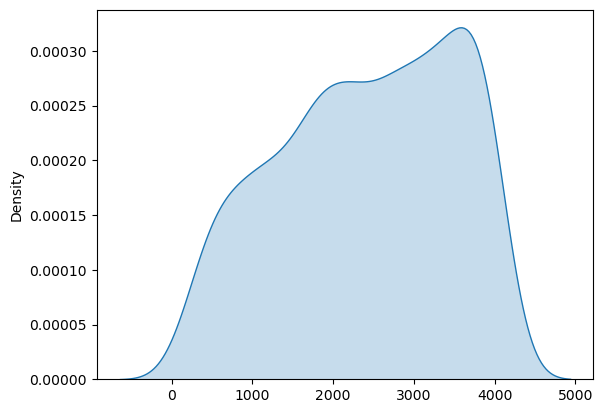

In [77]:
yeo_refund, lambda_value = stats.yeojohnson(final_df['refund'])
sns.kdeplot(yeo_refund, fill=True)

# STAGE 5 HYPOTHESIS TESTING

## 1. ONE-WAY ANOVA

### Is there any significant difference in the cost of goods sold among the three types of devices used by the customers while placing an order?

In [81]:
# For finding significant difference in SOMETHING among TWO or MORE groups we use ONE-WAY ANOVA
final_df['yeo_cost'] = yeo_cost

# Create sample data for three or more groups (replace this with your actual data)
PC_data = final_df[final_df['device_type'] == 'PC']
Tab_data = final_df[final_df['device_type'] == 'Tablet']
Mob_data = final_df[final_df['device_type'] == 'Mobile']

# Perform one-way ANOVA
f_statistic, p_value = stats.f_oneway(PC_data['yeo_cost'], Tab_data['yeo_cost'], Mob_data['yeo_cost'])

# Print the results
print("One-way ANOVA F-statistic:", f_statistic)
print("P-value:", p_value)

# Determine if the results are statistically significant
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference among the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference among the groups.")

One-way ANOVA F-statistic: 1.137886450846143
P-value: 0.3209082415386059
Fail to reject the null hypothesis: There is no significant difference among the groups.


## 2. PEARSON CORRELATION TEST

### Is there any statistically significant relationship between order value, cost and refund?

In [82]:
# For finding significant RELATIONSHIP between/among NUMERIC variables we use PEARSON CORRELATION TEST
# PEARSON CORRELATION follows only two variable so for 3 variable we use:

# Perform Pearson correlation tests
correlation1, p_value1 = stats.pearsonr(boxcox_orderval, yeo_cost)
correlation2, p_value2 = stats.pearsonr(boxcox_orderval, final_df['refund'])
correlation3, p_value3 = stats.pearsonr(final_df['refund'], yeo_cost)

# Print the correlation coefficients and p-values
print("Correlation between order value and cost:", correlation1)
print("P-value:", p_value1)
print("Correlation between order value and refund:", correlation2)
print("P-value:", p_value2)
print("Correlation between cost and refund:", correlation3)
print("P-value:", p_value3)

# Determine if the correlations are statistically significant
alpha = 0.05  # Significance level
if p_value1 < alpha:
    print("Correlation between order value and cost is statistically significant.")
else:
    print("Correlation between  order value and cost is not statistically significant.")

if p_value2 < alpha:
    print("Correlation between order value and refund is statistically significant.")
else:
    print("Correlation between order value and refund is not statistically significant.")

if p_value3 < alpha:
    print("Correlation between cost and refund is statistically significant.")
else:
    print("Correlation between cost and refund is not statistically significant.")

Correlation between order value and cost: 0.9922541547502688
P-value: 0.0
Correlation between order value and refund: 0.9597956424157411
P-value: 0.0
Correlation between cost and refund: 0.9535863737925903
P-value: 0.0
Correlation between order value and cost is statistically significant.
Correlation between order value and refund is statistically significant.
Correlation between cost and refund is statistically significant.


## 3. MULTIPLE REGRESSION

### Is there any significant impact of order value and cost on the refund amount?

In [83]:
import statsmodels.api as sm

# Add a constant term to the independent variables
X = sm.add_constant(np.column_stack((boxcox_orderval, yeo_cost)))

# Fit the linear regression model
model = sm.OLS(final_df['refund'], X).fit()

# Get the regression coefficients
coefficients = model.params

# Print the regression results
print("Regression Coefficients:")
print("Intercept:", coefficients[0])
print("Order Value Coefficient:", coefficients[1])
print("Cost Coefficient:", coefficients[2])

# Print the summary of the regression model
print("\nRegression Summary:")
print(model.summary())

Regression Coefficients:
Intercept: -97940.21945436357
Order Value Coefficient: 1099.3033949423223
Cost Coefficient: 107.14394214833891

Regression Summary:
                            OLS Regression Results                            
Dep. Variable:                 refund   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.921
Method:                 Least Squares   F-statistic:                     5889.
Date:                Thu, 08 Feb 2024   Prob (F-statistic):               0.00
Time:                        22:54:53   Log-Likelihood:                -10507.
No. Observations:                1009   AIC:                         2.102e+04
Df Residuals:                    1006   BIC:                         2.104e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t